/var/folders/4z/0371zfqj5mx0rlct4r3qclfm0000gn/T/ipykernel_82335/1589168628.py:148: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


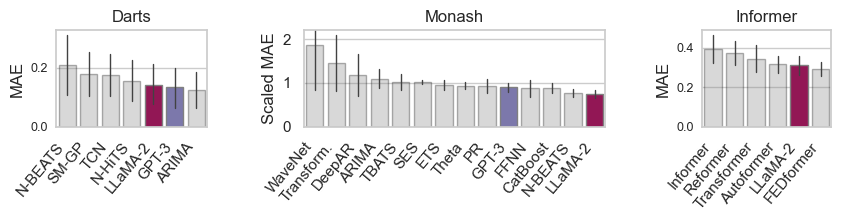

In [2]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.ticker import FormatStrFormatter
import matplotlib.gridspec as gridspec

sns.set(style="whitegrid", font_scale=1)

gpt_color = sns.color_palette('Dark2',3)[2]

name_order = ['N-BEATS','SM-GP','TCN','N-HiTS', "LLaMA-2", 'GPT-3', 'ARIMA']
def color_map(x):
    if x == 'GPT-3':
        return gpt_color
    elif x == 'LLaMA-2':
        return '#a60355'
    else:
        return 'grey'

palette = [color_map(x) for x in name_order]

csv_fn = "../precomputed_outputs/deterministic_csvs/darts_results_agg.csv"
df = pd.read_csv(csv_fn)
df['Type'] = df['Type'].apply(lambda x: x.replace(" 70B", ""))

fig, ax = plt.subplots(
    1, 3, 
    figsize=(10, 1.25), 
    gridspec_kw={'width_ratios': [7, 14, 6], 'wspace': 0.5},
)

c = sns.barplot(
    data=df,
    order=name_order,#['SM-GP','N-BEATS','TCN','N-HiTS','ARIMA','GPT-3','LLaMA70B'],
    x='Type',
    y='MAE',
    ax=ax[0], 
    color="grey",
    palette=palette,
    alpha=0.3,
    edgecolor='black',
    errwidth=1.,
    errorbar=('ci', 68)
)
for bar,name in zip(c.containers[0], name_order):
    if name != "GPT-3" and name != 'LLaMA-2':
        continue
    bar.set_alpha(1.0)
    bar.set_edgecolor('grey')

ax[0].set_ylabel('MAE')
ax[0].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax[0].tick_params(axis='y', which='major', pad=0, labelsize=9)
ax[0].set(xlabel=None)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=50, horizontalalignment='right')
ax[0].set_xlabel('')  # Remove x-axis label
ax[0].set_title("Darts")

csv_fn = "../precomputed_outputs/deterministic_csvs/monash_results_agg.csv"
df = pd.read_csv(csv_fn)
sorted_vals = df.groupby(["method"])['v'].aggregate(np.mean).reset_index().sort_values('v')
name_order = list(sorted_vals.values[:,0])[::-1]

def color_map(x):
    if x == 'GPT-3':
        return gpt_color
    elif x == 'LLaMA-2':
        return '#a60355'
    else:
        return 'grey'

palette = [color_map(x) for x in name_order]

c = sns.barplot(
    data=df,
    x='method',
    y="v",
    order=name_order,
    color="grey",
    palette=palette,
    alpha=0.3,
    edgecolor='black',
    errwidth=1.,
    ax=ax[1],
    errorbar=('ci', 68)
)
for bar,name in zip(c.containers[0], name_order):
    if name != "GPT-3" and name != 'LLaMA-2':
        continue
    bar.set_alpha(1.0)
    bar.set_edgecolor('grey')

ax[1].set_ylabel('')
ax[1].set_ylabel('Scaled MAE')#, fontsize=16)
ax[1].set_ylim(0, 2.2)
ax[1].set_xlabel("")
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=50, horizontalalignment='right')
ax[1].set_title("Monash")

csv_fn = "../precomputed_outputs/deterministic_csvs/autoformer_comb_results.csv"
df = pd.read_csv(csv_fn)
df['method'] = df['method'].apply(lambda x: x.replace(" 70B", ""))

name_order = ['Informer', 'Reformer', 'Transformer', 'Autoformer', 'LLaMA-2', 'FEDformer']

def color_map(x):
    if x == 'GPT-3':
        return gpt_color
    elif x == 'LLaMA-2':
        return '#a60355'
    else:
        return 'grey'

palette = [color_map(x) for x in name_order]

c = sns.barplot(
    data=df[df['pred_len'] == 96],
    x='method',
    y='mae',
    order=name_order,
    errwidth=1.,
    color="grey",
    palette=palette,
    alpha=0.3,
    edgecolor='black',
    ax=ax[2],
    errorbar=('ci', 68)
)
ax[2].set_xlabel("")
# ax.set_xticklabels([])
ax[2].tick_params(axis='y', which='major', pad=0, labelsize=9)
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=50, horizontalalignment='right')

for bar,name in zip(c.containers[0], name_order):
    if name != "GPT-3" and name != 'LLaMA-2':
        continue
    bar.set_alpha(1.0)
    bar.set_edgecolor('grey')

ax[2].set_ylabel("MAE")#, fontsize=17)
ax[2].set_title("Informer")
# ax.set_ylim(0, 0.7)
# ax.set_title("Aggregated (horizon = 96)", pad=15)

plt.tight_layout()
plt.savefig('outputs/mae_aggregated.pdf', bbox_inches='tight')
plt.show()


### Darts

In [ ]:
# from matplotlib.ticker import FormatStrFormatter
# import matplotlib.gridspec as gridspec

# sns.set(style="whitegrid", font_scale=1)

# name_map = {
#     "gp": "SM-GP",
#     "arima": "ARIMA",
#     "TCN": "TCN",
#     "N-BEATS": "N-BEATS",
#     "N-HiTS": "N-HiTS",
#     'text-davinci-003':'GPT-3',
#     'LLaMA7B': 'LLaMA7B',
#     'LLaMA13B': 'LLaMA13B',
#     'LLaMA30B': 'LLaMA30B', 
#     'LLaMA70B': 'LLaMA70B',
#     "llama1_7B": "LLaMA 7B",
#     "llama1_13B": "LLaMA 13B",
#     "llama1_30B": "LLaMA 30B",
#     "llama1_70B": "LLaMA 70B",
#     "llama2_7B": "LLaMA-2 7B",
#     "llama2_13B": "LLaMA-2 13B",
#     "llama2_70B": "LLaMA-2 70B",
#     "llama2_7B_chat": "LLaMA-2 7B (chat)",
#     "llama2_13B_chat": "LLaMA-2 13B (chat)",
#     "llama2_70B_chat": "LLaMA-2 70B (chat)",
# }

# hue_order = ['SM-GP','N-BEATS','TCN','N-HiTS','ARIMA']#, 'LLaMA70B']
# hue_order += ["LLaMA-2 70B", 'GPT-3']
# # hue_order += [
# #     "LLaMA 7B", "LLaMA-2 7B", "LLaMA-2 7B (chat)",
# #     "LLaMA 13B", "LLaMA-2 13B", "LLaMA-2 13B (chat)",
# #     "LLaMA 30B", "LLaMA 70B", "LLaMA-2 70B", "LLaMA-2 70B (chat)"
# # ]
# nlls = defaultdict(list)
# crps = defaultdict(list)
# mae = defaultdict(list)
# datasets = get_datasets()
# for dsname,(train,test) in datasets.items():
#     # if dsname == "SunspotsDataset":
#     #     continue

#     # print(dsname)
#     with open(f'eval/small_context_tuned/{dsname}.pkl','rb') as f:
#         data_dict = pickle.load(f)
#     for model_name,preds in data_dict.items():
#         # print(f"\t{model_name}")
#         if model_name in ['ada','babbage','curie']:
#             continue
#         if 'NLL/D' not in preds:
#             continue
#         nll = preds['NLL/D']
#         if model_name=='text-davinci-003-tuned':
#             model_name='GPT3'

#         if type(preds['samples']) == np.ndarray:
#             nlls[model_name].append(nll)
#             crps[model_name].append(calculate_crps(test.values,preds['samples'][:10],10))
#             tmae = np.abs(test.values-preds['median']).mean()/np.abs(test.values).mean()
#             mae[model_name].append(tmae)
#         else:
#             nlls[model_name].append(nll)
#             crps[model_name].append(calculate_crps(test.values,preds['samples'].values[:10],10))
#             tmae = np.abs(test.values-preds['median']).mean()/np.abs(test.values).mean()
#             mae[model_name].append(tmae)

# llama_models = [
#     "llama1_7B",
#     "llama2_7B",
#     "llama2_7B_chat",
#     "llama1_13B",
#     "llama2_13B",
#     "llama2_13B_chat",
#     "llama1_30B",
#     "llama1_70B",
#     "llama2_70B",
#     "llama2_70B_chat",
# ]
# for dsname,(train,test) in datasets.items():
#     # if dsname == "SunspotsDataset":
#     #     continue

#     for model_name in llama_models:
#         if model_name in ['llama2_70B', 'llama2_70B_chat']:
#             fn = f'eval/llama_70B_sweep_sample/{model_name}/darts-{dsname}/1.0_0.9_0.99_0.3_3_,_.pkl'
#         else:
#             fn = f'eval/llama_2_results/{model_name}/darts-{dsname}/0.4_0.9_0.99_0.3_3_,_.pkl'
#         with open(fn,'rb') as f:
#             data_dict = pickle.load(f)

#         preds = data_dict#[model_name]

#         if 'NLL/D' not in preds:
#             continue
#         nll = preds['NLL/D']

#         if type(preds['samples']) == np.ndarray:
#             nlls[model_name].append(nll)
#             crps[model_name].append(calculate_crps(test.values,preds['samples'][:10],10))
#             tmae = np.abs(test.values-preds['median']).mean()/np.abs(test.values).mean()
#             mae[model_name].append(tmae)
#         else:
#             nlls[model_name].append(nll)
#             crps[model_name].append(calculate_crps(test.values,preds['samples'].values[:10],10))
#             tmae = np.abs(test.values-preds['median']).mean()/np.abs(test.values).mean()
#             mae[model_name].append(tmae)


# nlls = {k:np.array(v) for k,v in nlls.items()}
# crps = {k:np.array(v) for k,v in crps.items()}
# mae = {k:np.array(v) for k,v in mae.items()}

# dfs = [pd.DataFrame({'Dataset':dataset_keys,'NLL/D':v,'Type':k, 'CRPS':crps[k],'MAE':mae[k]}) for k,v in nlls.items()]
# df = pd.concat(dfs)

# df['Type'] = df['Type'].apply(lambda x: name_map[x])

# df.to_csv("darts_results_agg.csv")

### Monash

In [ ]:
# import itertools
# import pickle 
# from data.serialize import SerializerSettings
# from types import SimpleNamespace
# import pickle

# # load results into {ds_name: pred_dict} dict
# gpt_results = {}
# for ds_name in datasets:
#     if ds_name == "kaggle_web_traffic_weekly":
#         continue

#     path = f'eval/{ds_name}.pkl'
#     with open(path, 'rb') as f:
#         pred_dict = pickle.load(f)
#     gpt_results[ds_name] = pred_dict
#     gpt_results[ds_name]['test_frac'] = len(pred_dict['preds']) / len(datasets[ds_name])

#     # add GPT MAE as a column in df_paper
# df_paper = pd.read_csv('eval/paper_mae_normalized.csv')
# for ds_name in gpt_results:
#     df_paper.loc[df_paper['Dataset'] == ds_name, 'normalized_davinci'] = gpt_results[ds_name]['mae'] / df_paper[df_paper['Dataset'] == ds_name]['Last Value'].values[0]
#     # test frac
#     df_paper.loc[df_paper['Dataset'] == ds_name, 'test_frac'] = gpt_results[ds_name]['test_frac']
# # save df_paper
# df_paper.to_csv(f'eval/davinci_tuned_mae.csv', index=False)
# df_paper = df_paper[df_paper['Dataset'].isin(predictable_datasets)]
# df_paper

In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# tractable_datasets =  [
#     "covid_deaths", "solar_weekly", "tourism_monthly", "australian_electricity_demand", "pedestrian_counts",
#     "traffic_hourly", "hospital", "fred_md", "tourism_yearly", "tourism_quarterly", "us_births",
#     "nn5_weekly","solar_10_minutes", "traffic_weekly", "saugeenday", "cif_2016",
#     # "weather"
# ]

# df = pd.read_csv(f'eval/davinci_tuned_mae.csv')
# df['normalized_llama'] = pd.read_csv(f'eval/llama_tuned_mae.csv')['normalized_llama']
# df = df[df['Dataset'].isin(tractable_datasets)]
# df = df.drop("Dataset", axis=1)
# # print(df)

# new_df = []
# for i, c in enumerate(df.columns):
#     if c == 'test_frac':
#         continue

#     for v in df.values[:,i]:
#         new_df.append({"method": c, "v": v})
# df = pd.DataFrame(new_df)
# df = df[df['method'] != 'Last Value']
# df = df[df['method'] != 'normalized_min']
# df = df[df['method'] != 'normalized_median']
# print(np.unique(df['method']))

# gpt_color = sns.color_palette('Dark2',3)[2]
# name_map = {
#     '(DHR-)ARIMA': 'ARIMA',
#     'CatBoost': 'CatBoost',
#     'DeepAR': 'DeepAR',
#     'ETS': 'ETS',
#     'FFNN': 'FFNN',
#     'N-BEATS': 'N-BEATS',
#     'PR': 'PR',
#     'SES': 'SES',
#     'TBATS': 'TBATS',
#     'Theta': 'Theta',
#     'Transformer': 'Transform.',
#     'WaveNet': 'WaveNet',
#     'normalized_davinci': "GPT-3",
#     'normalized_llama': 'LLaMA-2',
# }
# df['method'] = df['method'].apply(lambda s: name_map[s])

# sorted_vals = df.groupby(["method"])['v'].aggregate(np.mean).reset_index().sort_values('v')
# name_order = list(sorted_vals.values[:,0])[::-1]

# def color_map(x):
#     if x == 'GPT-3':
#         return gpt_color
#     elif x == 'LLaMA-2':
#         return '#a60355'
#     else:
#         return 'grey'

# palette = [color_map(x) for x in name_order]

# fig, ax = plt.subplots(figsize=(4, 3))
# c = sns.barplot(
#     data=df,
#     x='method',
#     y="v",
#     order=name_order,
#     color="grey",
#     palette=palette,
#     alpha=0.3,
#     edgecolor='black',
#     errwidth=1.
# )
# for bar,name in zip(c.containers[0], name_order):
#     if name != "GPT-3" and name != 'LLaMA-2':
#         continue
#     bar.set_alpha(1.0)
#     bar.set_edgecolor('grey')

# plt.ylabel('')
# plt.ylabel('Normalized MAE', fontsize=16)
# # plt.title('Monash', fontsize=16)
# plt.ylim(0, 2.2)
# plt.xticks(rotation=60)
# plt.margins(x=0.02)

# #change fontsize of y tick labels
# ax.tick_params(axis='y', which='major', labelsize=13)

# plt.tight_layout()
# plt.savefig('monash_bars.pdf', dpi=300, bbox_inches='tight')
# plt.show()

# df.to_csv("monash_results_agg.csv", index=False)